In [18]:
!pip install scikit-learn hf_xet  matplotlib

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB 325.1 kB/s eta 0:00:09
    --------------------------------------- 0.1/2.8 MB 409.6 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.8 MB 595.3 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.8 MB 607.9 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.8 MB 1.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.8 MB 999.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.5/2.8 MB 1.6 MB/s eta 0:00:02
   ------------ --------------------------- 0.9/2.8 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.8 MB 2.5 MB/s eta 0:00:01
   ---------------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# @ Project: Classify Medium Articles with Bag of Words
from huggingface_hub import hf_hub_download

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
  ConfusionMatrixDisplay)

c:\Users\2019c\OneDrive\Desktop\NLPplanet\nlpplanet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# download dataset of Medium articles from 
# https://huggingface.co/datasets/fabiochiu/medium-articles
df_articles = pd.read_csv(
  hf_hub_download("fabiochiu/medium-articles", repo_type="dataset",
                  filename="medium_articles.csv")
)

df_articles.head()



,title,text,url,authors,timestamp,tags,is_data_science,full_text
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",False,Mental Note Vol. 24 Photo by Josh Riemer on Un...
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",False,Your Brain On Coronavirus Your Brain On Corona...
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",False,Mind Your Nose Mind Your Nose\n\nHow smell tra...
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",False,The 4 Purposes of Dreams Passionate about the ...
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",False,Surviving a Rod Through the Head You’ve heard ...


In [3]:
# create two columns:
# - full_text: contains the concatenation of the title and the text of the article.
# - is_data_science: a boolean which is True if the article has the "Data Science" tag
df_articles["is_data_science"] = df_articles["tags"] \
  .apply(lambda tags_list: "Data Science" in tags_list)
df_articles["full_text"] = df_articles["title"] + " " + df_articles["text"]
df_articles.head()

,title,text,url,authors,timestamp,tags,is_data_science,full_text
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",False,Mental Note Vol. 24 Photo by Josh Riemer on Un...
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",False,Your Brain On Coronavirus Your Brain On Corona...
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",False,Mind Your Nose Mind Your Nose\n\nHow smell tra...
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",False,The 4 Purposes of Dreams Passionate about the ...
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",False,Surviving a Rod Through the Head You’ve heard ...


In [4]:
# sample 1000 articles is_data_science = True and 1000 articles with
# is_data_science = False
df = pd.concat([
    df_articles[df_articles["is_data_science"]].sample(n=1000),
    df_articles[~df_articles["is_data_science"]].sample(n=1000)
])

In [5]:
# train/test split
X = df[["full_text"]]
y = df["is_data_science"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# fit vectorizer, vectorize train set, and train the classification model
vectorizer = CountVectorizer(ngram_range=(1, 1))
full_texts_vectorized = vectorizer.fit_transform(X_train["full_text"])
model = LogisticRegression()
model.fit(full_texts_vectorized, y_train)

c:\Users\2019c\OneDrive\Desktop\NLPplanet\nlpplanet\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
# vectorize test set and predict
full_texts_vectorized = vectorizer.transform(X_test["full_text"])
predictions = model.predict(full_texts_vectorized)

In [8]:
# plot precision, recall, f1-score on test set
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.88      0.95      0.92       200
        True       0.95      0.87      0.91       200

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400



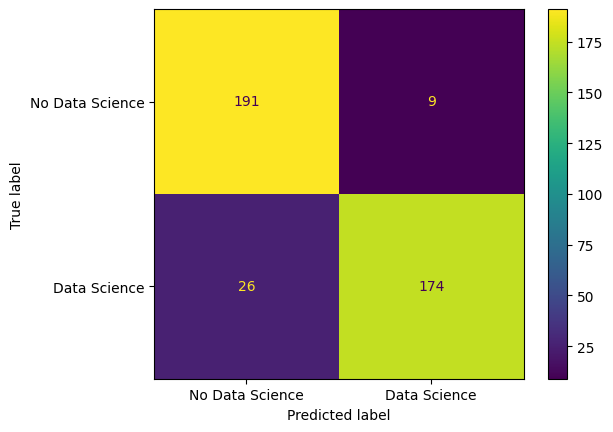

In [9]:
# plot confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No Data Science", "Data Science"])
p = disp.plot()
fig = p.figure_
fig.set_facecolor('white')

In [10]:
# show top 20 ngrams by logistic regression weight
ngram_indices_sorted = sorted(list(vectorizer.vocabulary_.items()), key=lambda t: t[1])
ngram_sorted = list(zip(*ngram_indices_sorted))[0]
ngram_weight_pairs = list(zip(ngram_sorted, model.coef_[0]))
ngram_weight_pairs_sorted = sorted(ngram_weight_pairs, key=lambda t: t[1], reverse=True)
ngram_weight_pairs_sorted[:20]

[('science', np.float64(0.7554526106314894)),
 ('data', np.float64(0.687376043265003)),
 ('intelligence', np.float64(0.47791984087699235)),
 ('apa', np.float64(0.4557306178004249)),
 ('itu', np.float64(0.4510938179078979)),
 ('mengenal', np.float64(0.4510938179078979)),
 ('saja', np.float64(0.4510938179078979)),
 ('tipe', np.float64(0.4510938179078979)),
 ('bem', np.float64(0.4266014787100169)),
 ('seja', np.float64(0.4266014787100169)),
 ('vindo', np.float64(0.4266014787100169)),
 ('python', np.float64(0.4096370462612471)),
 ('hmmlearn', np.float64(0.4020940304730794)),
 ('artificial', np.float64(0.3690324794491105)),
 ('software', np.float64(0.36752092770335626)),
 ('day52', np.float64(0.3631685101738537)),
 ('感測器', np.float64(0.3631685101738537)),
 ('物聯網應用與實作', np.float64(0.3631685101738537)),
 ('程式學習之路', np.float64(0.3631685101738537)),
 ('share', np.float64(0.3583631000945763))]

In [11]:
df_articles["is_python"] = df_articles["tags"].apply(lambda x: "Python" in x)

In [12]:
df_articles['is_python'].value_counts()

is_python
False    188109
True       4259
Name: count, dtype: int64

In [13]:
train = pd.concat([df_articles[df_articles["is_python"]].sample(n=1000),
                   df_articles[~df_articles["is_python"]].sample(n=1000)])
X = train[["full_text"]]
y = train["is_python"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [15]:
vectorizer = CountVectorizer(ngram_range=(1,1))
vectorizer.fit(X_train["full_text"])
model = LogisticRegression()
model.fit(vectorizer.transform(X_train["full_text"]), y_train)

c:\Users\2019c\OneDrive\Desktop\NLPplanet\nlpplanet\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
predictions = model.predict(vectorizer.transform(X_test["full_text"]))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.90      0.94      0.92       200
        True       0.93      0.90      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
# Keep only rows where there's exactly one tag and it's in our desired list
target_tags = ["Artificial Intelligence", "Finance", "Politics"]

# Convert stringified lists to real Python lists
import ast

df_articles['tags'] = df_articles['tags'].apply(ast.literal_eval)

# Filter
df_filtered = df_articles[df_articles['tags'].apply(lambda tags: tags[0] in target_tags)].copy()
df_filtered['label'] = df_filtered['tags'].apply(lambda tags: tags[0])

print(df_filtered['label'].value_counts())


label
Politics                   1439
Artificial Intelligence     749
Finance                     245
Name: count, dtype: int64


In [21]:
train_label = pd.concat(
    [
        df_filtered[df_filtered['label'] == 'Artificial Intelligence'].sample(n=245),
        df_filtered[df_filtered['label'] == 'Finance'].sample(n=245),
        df_filtered[df_filtered['label'] == 'Politics'].sample(n=245)
    ]
)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_label[["full_text"]], train_label["label"], 
                                                    test_size=0.2, random_state=42, stratify=train_label["label"])

In [23]:
vectorizer = CountVectorizer(ngram_range=(1, 1))
full_texts_vectorized = vectorizer.fit_transform(X_train["full_text"])
model = LogisticRegression()
model.fit(full_texts_vectorized, y_train)

c:\Users\2019c\OneDrive\Desktop\NLPplanet\nlpplanet\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(vectorizer.transform(X_test["full_text"]))
print(classification_report(y_test, y_pred))


                         precision    recall  f1-score   support

Artificial Intelligence       0.86      0.86      0.86        49
                Finance       0.78      0.86      0.82        49
               Politics       0.86      0.78      0.82        49

               accuracy                           0.83       147
              macro avg       0.83      0.83      0.83       147
           weighted avg       0.83      0.83      0.83       147



In [26]:
from collections import Counter

# Count tag frequencies
all_tags = [tag for tags in df_articles['tags'] for tag in tags]
tag_counts = Counter(all_tags)

# Get top 500 tags
top_tags = set([tag for tag, _ in tag_counts.most_common(500)])

# Filter dataset to include only articles with at least one top tag
df_articles['tags'] = df_articles['tags'].apply(lambda tags: [tag for tag in tags if tag in top_tags])
df_articles = df_articles[df_articles['tags'].map(len) > 0].copy()


In [48]:
temp_X = df_articles[["full_text"]]
temp_X[~temp_X["full_text"].isna()].index 

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       192336, 192337, 192339, 192340, 192342, 192343, 192348, 192352, 192353,
       192355],
      dtype='int64', length=168331)

In [49]:
y = df_articles['tags']
y = y[df_articles['full_text'].notna()]

In [51]:
X = df_articles[["full_text"]]
X.dropna(inplace=True)
X["full_text"].isna().sum()

C:\Users\2019c\AppData\Local\Temp\ipykernel_4956\3225002041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


np.int64(0)

In [52]:
vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(X["full_text"])

In [53]:
X.shape, y.shape

((168331, 695130), (168331,))

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((134664, 695130), (33667, 695130), (134664, 500), (33667, 500))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

y_pred = model.predict(X_test)

In [ ]:
# Overall evaluation
print("Micro-average F1 score:", f1_score(y_test, y_pred, average="micro"))
print("Macro-average F1 score:", f1_score(y_test, y_pred, average="macro"))
print("Micro-average Precision:", precision_score(y_test, y_pred, average="micro"))
print("Micro-average Recall:", recall_score(y_test, y_pred, average="micro"))

# Optional: classification report for the first 20 labels
print(classification_report(y_test, y_pred, target_names=mlb.classes_[:20]))